In [ ]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.special import softmax
import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

In [ ]:
def draw_kkl(nx_G,label_map,node_color,pos=None,**kwargs):
  fig,ax = plt.subplots(figsize=(10,10))
  print(fig)
  print(ax)
  if pos is None:
    pos = nx.spring_layout(nx_G,k=5/np.sqrt(nx_G.number_of_nodes()))

  nx.draw(nx_G,pos,with_labels=label_map is not None,
          label=label_map,node_color=node_color,ax=ax,**kwargs)

In [ ]:
g = nx.karate_club_graph()

In [ ]:
g.number_of_nodes(), g.number_of_edges()

(34, 78)

In [ ]:
communities = greedy_modularity_communities(g)
print(communities)

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


In [ ]:
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(communities):
    colors[list(com)] = i

print(colors.astype(int))
n_classes = np.unique(colors).shape[0]
labels = np.eye(n_classes)[colors.astype(int)]
print(n_classes)
print(labels)

[2 1 1 1 2 2 2 1 0 1 2 2 1 1 0 0 2 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
3
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
club_labels = nx.get_node_attributes(g,'club')
print(club_labels)

{0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}


Figure(1000x1000)
Axes(0.125,0.11;0.775x0.77)


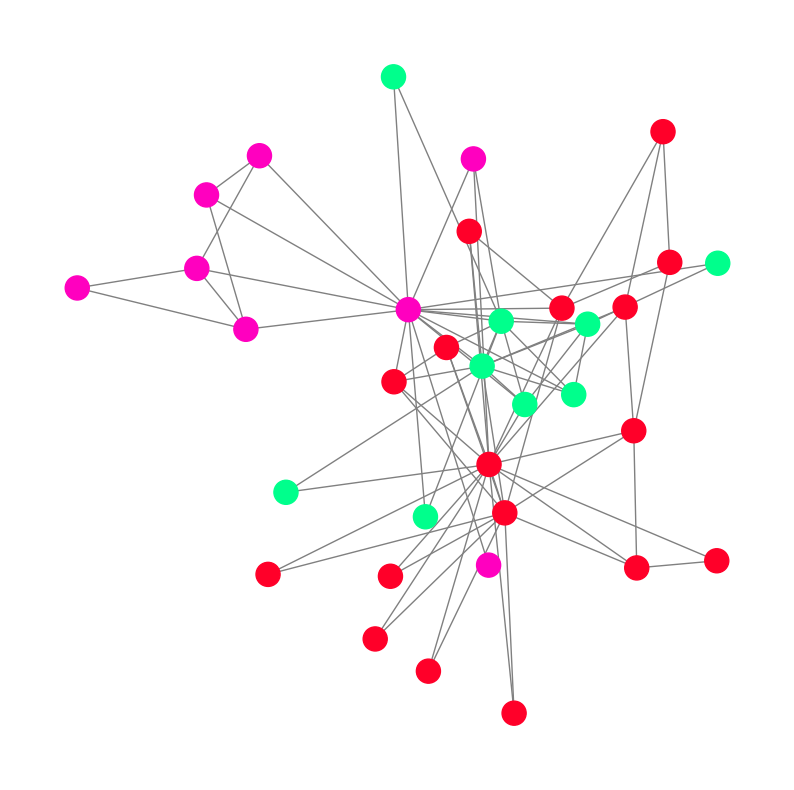

In [ ]:
_ = draw_kkl(g, None, colors, cmap='gist_rainbow', edge_color='gray')

In [ ]:
A = nx.adjacency_matrix(g)
A = A.todense()
print(A)

[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]


In [ ]:
for row in range(len(A)):
  for col in range(len(A[row])):
    if A[row][col] > 1:
      A[row][col] = 1

print(A)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
A_mod = A + np.eye(g.number_of_nodes()) #this operation self loops to the node

D_mod = np.zeros_like(A_mod)
print(D_mod)
np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(D_mod)

[[17.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 18.]]


In [ ]:
D_mod_invroot = np.linalg.inv(sqrtm(D_mod))
A_hat = D_mod_invroot @ A_mod @ D_mod_invroot
print(A_hat.shape)

(34, 34)


In [ ]:
X = np.eye(g.number_of_nodes())
print(X.shape)

(34, 34)


In [ ]:
def glorot_init(nin,nout):
  sd = np.sqrt(6.0 / (nin + nout))
  return np.random.uniform(-sd,sd,size=(nin,nout))

def xent(pred,labels):
  return -np.log(pred)[np.arange(pred.shape[0]), np.argmax(labels, axis=1)]
'''
def norm_diff(dW, dW_approx):
    return np.linalg.norm(dW - dW_approx) / (np.linalg.norm(dW) + np.linalg.norm(dW_approx))'''

'\ndef norm_diff(dW, dW_approx):\n    return np.linalg.norm(dW - dW_approx) / (np.linalg.norm(dW) + np.linalg.norm(dW_approx))'

In [ ]:
class GradientDescentOptim():
  def __init__(self,lr,wd):
    self.lr = lr
    self.wd = wd
    self._y_pred = None
    self._y_true = None
    self._out = None #output of the backward pass
    self.bs = None
    self.train_nodes = None

  def __call__(self,y_pred,y_true,train_nodes=None):
    self.y_pred = y_pred
    self.y_true = y_true

    if train_nodes is None:
      self.train_nodes = np.arange(y_pred.shape[0])
    else:
      self.train_nodes = train_nodes

    self.bs = self.train_nodes.shape[0]

  @property
  def out(self):
    return self._out

  @out.setter
  def out(self,y):
    self._out = y

class GCNLayer():
  def __init__(self,n_inputs,n_outputs,activation=None,name=''):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.W = glorot_init(self.n_outputs,self.n_inputs) #initial gradients
    self.activation = activation
    self.name = name

  def __repr__(self):
    return f"GCN: W{'_' +self.name if self.name else ''} ({self.n_inputs},{self.n_outputs})"

  def forward(self,A,X,W=None):
    self._A = A
    self._X = (A @ X).T

    if W is None:
      W = self.W

    H = W @ self._X

    if self.activation is not None:
      H = self.activation(H)

    self._H = H

    return self._H.T

  def backward(self,optim,update=True):
    dtanh = 1 - np.asarray(self._H.T)**2
    d2 = np.multiply(optim.out,dtanh)

    self.grad = self._A @ d2 @ self.W
    optim.out = self.grad

    dW = np.asarray(d2.T @ self._X.T) / optim.bs
    dW_wd = self.W * optim.wd / optim.bs

    if update:
      self.W -=  (dW + dW_wd) * optim.lr

    return dW + dW_wd



class SoftmaxLayer():
  def __init__(self,n_inputs,n_outputs,name=''):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.W = glorot_init(self.n_outputs,self.n_inputs)
    self.b = np.zeros((self.n_outputs,1))
    self.name = name
    self._X = None

  def __repr__(self):
    return f"Softmax: W{'_' +self.name if self.name else ''} ({self.n_inputs},{self.n_outputs})"

#To avoid overflow of gradients
  def shift(self,proj):
    shiftx = proj - np.max(proj,axis=0,keepdims=True)
    exps = np.exp(shiftx)
    return exps / np.sum(exps,axis=0,keepdims=True)

  def forward(self,X,W=None,b=None):
    self._X = X.T
    if W is None:
      W = self.W
    if b is None:
      b = self.b

    proj = (W @ self._X) + b

    return self.shift(proj).T

  def backward(self,optim,update=True):
    train_mask = np.zeros(optim.y_pred.shape[0])
    train_mask[optim.train_nodes] = 1
    train_mask = train_mask.reshape((-1,1))

    d1 = np.asarray((optim.y_pred - optim.y_true))
    d1 = np.multiply(d1,train_mask)

    self.grad = d1 @ self.W
    optim.out = self.grad

    dW = (d1.T @ self._X.T) / optim.bs
    db = d1.T.sum(axis=1,keepdims=True) /optim.bs

    dW_wd = self.W * optim.wd / optim.bs

    if update:
      self.W -= (dW + dW_wd) * optim.lr
      self.b -= db.reshape(self.b.shape) * optim.lr

    return dW + dW_wd, db.reshape(self.b.shape)

In [ ]:
gcn1 = GCNLayer(g.number_of_nodes(), 2, activation=np.tanh, name='1')

(2, 34)


In [ ]:
gcn1

GCN: W_1 (34,2)

In [ ]:
sm1 = SoftmaxLayer(2,n_classes,'SM')

In [ ]:
sm1

Softmax: W_SM (2,3)

In [ ]:
opt = GradientDescentOptim(lr=0, wd=1.)

In [ ]:
gcn1_out = gcn1.forward(A_hat,X)

In [ ]:
print(gcn1_out.shape[0])

34


In [ ]:
print(opt(sm1.forward(gcn1_out),labels))


None


In [ ]:
dW1,db = sm1.backward(opt,update=False)

In [ ]:
dW2 = gcn1.backward(opt,update=False)

In [ ]:
class GCNNetwork():
  def __init__(self,n_inputs,n_outputs,n_layers,hidden_sizes,activation,seed=0):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.n_layers = n_layers
    self.hidden_sizes = hidden_sizes
    self.activation = activation

    np.random.seed(seed)

    self.layers = list()

    gcn_in = GCNLayer(n_inputs,hidden_sizes[0],activation,name='in')
    print(gcn_in)
    self.layers.append(gcn_in)

    for layer in range(n_layers):
      gcn = GCNLayer(self.layers[-1].W.shape[0],hidden_sizes[layer],activation,name=f'h{layer}')
      self.layers.append(gcn)

    sm_out = SoftmaxLayer(hidden_sizes[-1], n_outputs, name='sm')
    self.layers.append(sm_out)

  def __repr__(self):
    return '\n' .join([str(l) for l in self.layers])

  def embedding(self,A,X):
    H = X
    for layers in self.layers[:-1]:
      H = layers.forward(A,H)
    return np.asarray(H)

  def forward(self,A,X):
    H = self.embedding(A,X)
    p = self.layers[-1].forward(H)
    return np.asarray(p)

In [ ]:
gcn_model = GCNNetwork(
    n_inputs=g.number_of_nodes(),
    n_outputs=n_classes,
    n_layers=2,
    hidden_sizes=[16, 2],
    activation=np.tanh,
    seed=100,
)
gcn_model

GCN: W_in (34,16)


GCN: W_in (34,16)
GCN: W_h0 (16,16)
GCN: W_h1 (16,2)
Softmax: W_sm (2,3)

In [ ]:
y_pred = gcn_model.forward(A_hat,X)
print(y_pred)
emb = gcn_model.embedding(A_hat,X)
print(emb)
xent(y_pred,labels).mean()

[[0.33651114 0.33041204 0.33307683]
 [0.34613854 0.33148686 0.3223746 ]
 [0.34970121 0.33228656 0.31801223]
 [0.34109321 0.33718421 0.32172258]
 [0.32889304 0.33170757 0.33939939]
 [0.32957213 0.32984665 0.34058122]
 [0.32856967 0.33030163 0.34112871]
 [0.34213064 0.33369823 0.32417113]
 [0.34600327 0.33125095 0.32274577]
 [0.34642806 0.33649131 0.31708063]
 [0.32920832 0.3335249  0.33726678]
 [0.32004403 0.32373386 0.35622211]
 [0.33336729 0.3379837  0.32864901]
 [0.34230475 0.33409322 0.32360204]
 [0.34217468 0.33614759 0.32167772]
 [0.3433195  0.33641101 0.3202695 ]
 [0.32988693 0.3299264  0.34018668]
 [0.33529477 0.32865904 0.33604619]
 [0.34351727 0.33329325 0.32318948]
 [0.33873021 0.3304979  0.33077189]
 [0.34189215 0.33415804 0.32394981]
 [0.34294499 0.33031548 0.32673953]
 [0.34672844 0.33302501 0.32024656]
 [0.34788036 0.32907492 0.32304472]
 [0.34398684 0.3224838  0.33352936]
 [0.34449271 0.32354629 0.331961  ]
 [0.34037413 0.33436276 0.32526311]
 [0.34675842 0.33018905 0.32

1.0759636138197175

In [ ]:
print(emb)

[[-3.56366164e-04 -1.87128943e-02]
 [ 3.06443082e-02 -5.40584115e-02]
 [ 4.35739382e-02 -6.61451469e-02]
 [ 3.47111770e-02 -2.26761342e-02]
 [-1.77486784e-02  1.42989275e-02]
 [-2.17449424e-02  7.63120620e-03]
 [-2.31172510e-02  1.26124644e-02]
 [ 2.63362589e-02 -3.38876770e-02]
 [ 2.94814372e-02 -5.40265420e-02]
 [ 4.79363970e-02 -4.48850509e-02]
 [-1.10849208e-02  1.68598382e-02]
 [-6.74065454e-02  3.27969193e-02]
 [ 1.50261458e-02  9.47250015e-03]
 [ 2.81256345e-02 -3.37512737e-02]
 [ 3.44570311e-02 -2.90236614e-02]
 [ 3.86353281e-02 -3.29566689e-02]
 [-2.06073503e-02  6.54306625e-03]
 [-9.42485945e-03 -1.76356662e-02]
 [ 2.90070818e-02 -4.01321147e-02]
 [ 6.22299582e-03 -2.72594686e-02]
 [ 2.71485783e-02 -3.20059920e-02]
 [ 1.76520652e-02 -4.41148023e-02]
 [ 3.73974602e-02 -5.31503313e-02]
 [ 2.77386414e-02 -6.58346076e-02]
 [-4.83817000e-03 -6.49247272e-02]
 [ 3.67624448e-05 -6.45706399e-02]
 [ 2.34469855e-02 -2.56428448e-02]
 [ 2.81716229e-02 -5.91666226e-02]
 [ 1.16294634e-02 -4

In [ ]:
pos = {i: emb[i,:] for i in range(emb.shape[0])}
print(pos)

{0: array([-0.00035637, -0.01871289]), 1: array([ 0.03064431, -0.05405841]), 2: array([ 0.04357394, -0.06614515]), 3: array([ 0.03471118, -0.02267613]), 4: array([-0.01774868,  0.01429893]), 5: array([-0.02174494,  0.00763121]), 6: array([-0.02311725,  0.01261246]), 7: array([ 0.02633626, -0.03388768]), 8: array([ 0.02948144, -0.05402654]), 9: array([ 0.0479364 , -0.04488505]), 10: array([-0.01108492,  0.01685984]), 11: array([-0.06740655,  0.03279692]), 12: array([0.01502615, 0.0094725 ]), 13: array([ 0.02812563, -0.03375127]), 14: array([ 0.03445703, -0.02902366]), 15: array([ 0.03863533, -0.03295667]), 16: array([-0.02060735,  0.00654307]), 17: array([-0.00942486, -0.01763567]), 18: array([ 0.02900708, -0.04013211]), 19: array([ 0.006223  , -0.02725947]), 20: array([ 0.02714858, -0.03200599]), 21: array([ 0.01765207, -0.0441148 ]), 22: array([ 0.03739746, -0.05315033]), 23: array([ 0.02773864, -0.06583461]), 24: array([-0.00483817, -0.06492473]), 25: array([ 3.67624448e-05, -6.45706

Figure(1000x1000)
Axes(0.125,0.11;0.775x0.77)


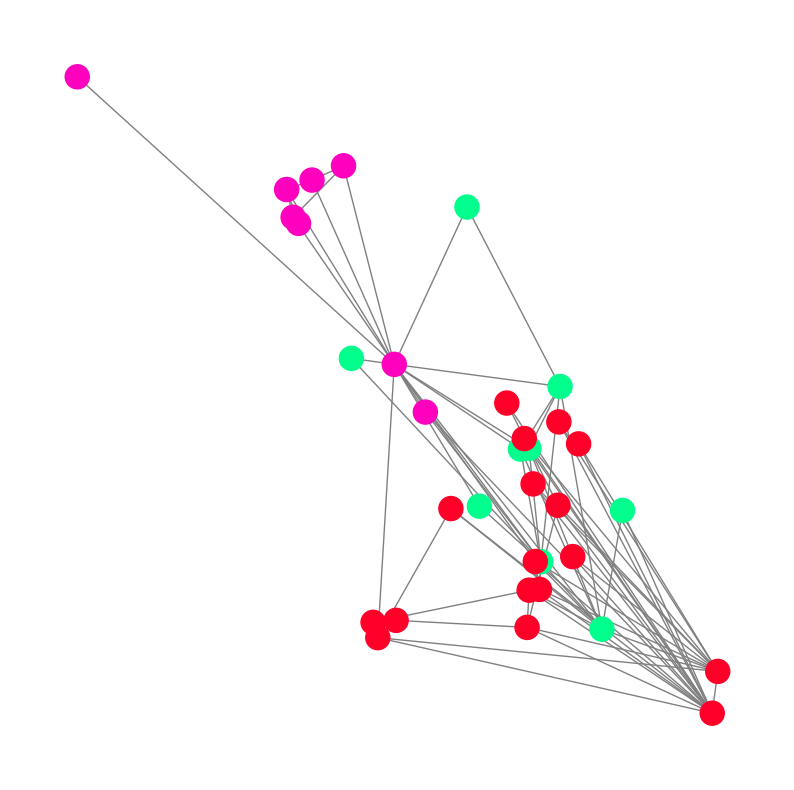

In [ ]:
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

In [ ]:
train_nodes = np.array([0,1,8])
test_nodes = np.array([i for i in range (labels.shape[0]) if i not in train_nodes])
opt2 = GradientDescentOptim(lr=2e-2, wd=2.5e-2)

In [ ]:
embs = list()
accs = list()
train_loss = list()
test_loss = list()

loss_min = 1e6
es_iters = 0
es_steps = 50

for epoch in range(15000):
  y_pred = gcn_model.forward(A_hat,X)
  opt2(y_pred,labels,train_nodes)

  for layers in reversed(gcn_model.layers):
    layers.backward(opt2,update=True)

  embs.append(gcn_model.embedding(A_hat,X))

  acc = (np.argmax(y_pred, axis=1)==np.argmax(labels, axis=1))[[i for i in range(labels.shape[0]) if i not in train_nodes]]
  accs.append(acc.mean())

  loss = xent(y_pred,labels)
  #print(loss)
  loss_train = loss[train_nodes].mean()
  #print(loss_train)
  loss_test = loss[test_nodes].mean()
  #print(loss_test)

  train_loss.append(loss_train)
  test_loss.append(loss_test)

  if loss_test < loss_min:
    loss_min = loss_test
    es_iters = 0
  else:
    es_iters += 1

  if es_iters > es_steps:
    print('Early stopping')
    break

  if epoch % 100 == 0:
    print(f"Epoch: {epoch+1}, Train_loss: {loss_train:.3f}, Test_loss: {loss_test:.3f}")

train_loss = np.array(train_loss)
test_loss = np.array(test_loss)

Epoch: 1, Train_loss: 1.088, Test_loss: 1.075
Epoch: 101, Train_loss: 0.961, Test_loss: 0.950
Epoch: 201, Train_loss: 0.612, Test_loss: 0.558
Epoch: 301, Train_loss: 0.416, Test_loss: 0.431
Epoch: 401, Train_loss: 0.331, Test_loss: 0.406
Epoch: 501, Train_loss: 0.268, Test_loss: 0.392
Epoch: 601, Train_loss: 0.214, Test_loss: 0.380
Epoch: 701, Train_loss: 0.170, Test_loss: 0.371
Epoch: 801, Train_loss: 0.139, Test_loss: 0.366
Epoch: 901, Train_loss: 0.120, Test_loss: 0.364
Early stopping


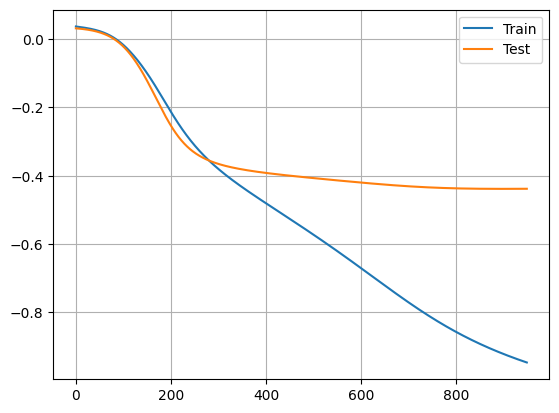

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.log10(train_loss), label='Train')
ax.plot(np.log10(test_loss), label='Test')
ax.legend()
ax.grid()

In [ ]:
accs[-1]

0.8709677419354839

In [ ]:
N = 500
snapshots = np.linspace(0, len(embs)-1, N).astype(int)

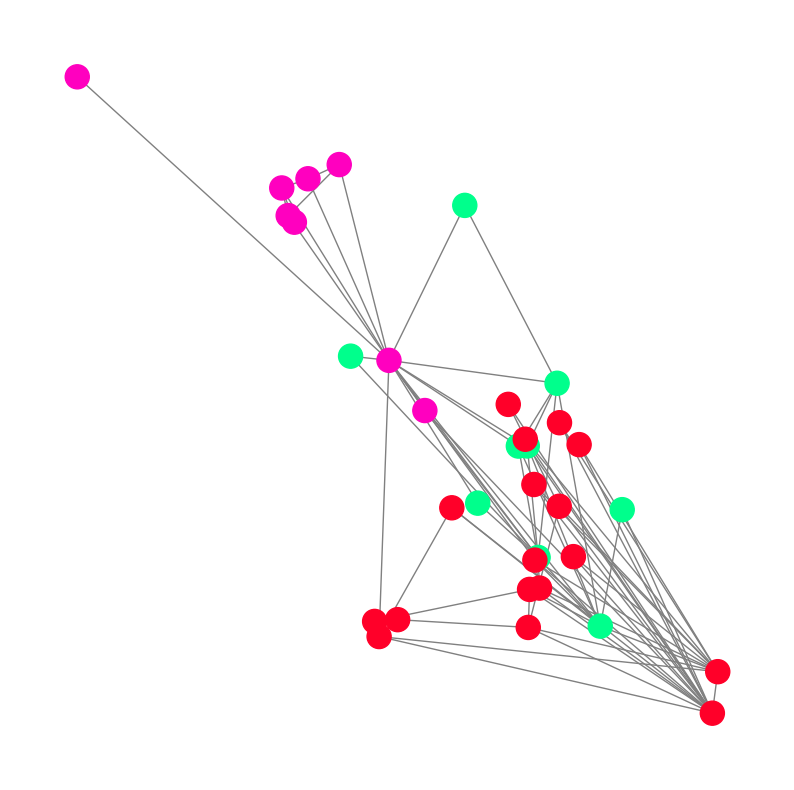

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
kwargs = {'cmap': 'gist_rainbow', 'edge_color': 'gray', }#'node_size': 55}

def update(idx):
    ax.clear()
    embed = embs[snapshots[idx]]
    pos = {i: embed[i,:] for i in range(embed.shape[0])}
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)

anim = animation.FuncAnimation(fig, update, frames=snapshots.shape[0], interval=10, repeat=False)

In [ ]:
HTML(anim.to_html5_video())